In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras.utils
import keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2634 sha256=6b75317662eeed539b47cf5f14a2bd2a8a072a2b7b73d1fedb545e67d6e4c2ed
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.callbacks import Callback

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import cv2

In [ ]:
No_pos= 106;
No_neg = 101;
pos_samples = np.zeros((No_pos, 40, 40))
neg_samples = np.zeros((No_neg, 40, 40))
#print(pos_samples)

In [ ]:
index = 0;
for root, dirnames, filenames in os.walk('/content/drive/MyDrive/M.Phil/Data_Asymmetry/AD/'):
  for dirname in dirnames:
    path = ('/content/drive/MyDrive/M.Phil/Data_Asymmetry/AD/' + dirname + "/" + 'NormAdj_Matrix_WeightedN.csv')
    data = pd.read_csv(path, header=None)

    pos_samples[index, :, : ] = data.iloc[40:80,40:80]
    print(index, dirname)
    index = index + 1
index = 0;
for root, dirnames, filenames in os.walk('/content/drive/MyDrive/M.Phil/Data_Asymmetry/CN/'):
  for dirname in dirnames:
    path = ('/content/drive/MyDrive/M.Phil/Data_Asymmetry/CN/' + dirname + "/" + 'NormAdj_Matrix_WeightedN.csv')
    #print(path)
    data = pd.read_csv(path, header=None)
    neg_samples[index, :, : ] = data.iloc[40:80,40:80]
    print(index + 106, dirname)
    index = index + 1

0 941_S_6854
1 301_S_6592
2 168_S_6828
3 168_S_6142
4 168_S_6843
5 168_S_6827
6 168_S_6735
7 168_S_6921
8 168_S_6754
9 135_S_7003
10 127_S_5095
11 135_S_6840
12 135_S_6687
13 135_S_6389
14 127_S_6433
15 129_S_6763
16 135_S_6545
17 135_S_6284
18 127_S_6549
19 129_S_6784
20 127_S_5067
21 127_S_5058
22 127_S_4992
23 127_S_5056
24 127_S_4940
25 127_S_5028
26 127_S_4749
27 127_S_4500
28 126_S_4686
29 126_S_6721
30 126_S_6683
31 126_S_4494
32 123_S_6825
33 114_S_6595
34 114_S_6368
35 114_S_6347
36 098_S_6658
37 116_S_6100
38 098_S_6655
39 116_S_6543
40 109_S_4378
41 098_S_4215
42 098_S_4201
43 052_S_4959
44 094_S_6736
45 082_S_6690
46 094_S_4089
47 094_S_4282
48 052_S_5062
49 057_S_6869
50 057_S_6746
51 094_S_4737
52 036_S_6231
53 035_S_6660
54 033_S_6705
55 035_S_7001
56 035_S_6650
57 032_S_6600
58 032_S_6602
59 036_S_6179
60 033_S_6824
61 033_S_6976
62 029_S_4307
63 027_S_6965
64 023_S_6661
65 027_S_4964
66 027_S_4802
67 027_S_4938
68 027_S_6733
69 027_S_4962
70 027_S_6849
71 027_S_4801
72

In [ ]:

Data = np.concatenate((pos_samples, neg_samples), axis =0)
#print(data.shape)
Y_pos = np.zeros(No_pos)
Y_neg = np.ones(No_neg)
Label = np.concatenate((Y_pos, Y_neg), axis =0)
print(Label)
#train_data, test_data,train_label, test_label = train_test_split(Data, Label, test_size=0.2, shuffle=True )
print(Data.shape)
# print(Label.shape)
Data = Data.reshape(Data.shape[0], Data.shape[1], Data.shape[2], 1)
print(Label.dtype)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(207, 40, 40)
float64


In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = 3, padding='same', strides=(1, 1),input_shape = (40,40,1)))
  model.add(AveragePooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1),padding='same', activation = 'relu'))
  model.add(AveragePooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1),padding='same', activation = 'relu', name = "last_conv"))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation='softmax'))
  # model.summary()
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding='same',activation = 'relu', strides=(1, 1),input_shape = (40,40,1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1),padding='same', activation = 'relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1),padding='same', activation = 'relu', name = "last_conv"))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 20, 20, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 10, 10, 64)       0         
 ePooling2D)                                                     
                                                                 
 last_conv (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 12800)             0

In [ ]:
def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test, index):
  # callback = [TerminateOnBaseline(monitor='accuracy', baseline=1)]
  # callback = myCallback()
  # print("Train Labels",labels_train)
  checkpoint_path = "/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/weights_best.hdf5"
  checkpoint_dir = os.path.dirname(checkpoint_path)
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                   monitor='val_accuracy',mode='max',
                                                 save_best_only=True,
                                                 verbose=1)
  model.fit(x=data_train, y=labels_train, batch_size=64, callbacks=[cp_callback], epochs=50, validation_data=[data_test, labels_test])
  prediticted_classes = model.predict(data_test, batch_size=4)
  print("Predict Classes", prediticted_classes)
  print("Evaluate on test data")
  results = model.evaluate(data_test, labels_test, verbose=0)
  print("test loss, test acc:", results)

  modelbest = create_model()
  modelbest.load_weights("/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/weights_best.hdf5")
  resultsT = modelbest.evaluate(data_test, labels_test, verbose=0)
  # save model
  modelbest.save('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index+1)+'/best.hdf5')

  return results, resultsT

In [ ]:
splits = 5
accuracy = np.zeros(splits)
accuracyBest = np.zeros(splits)
index = 0;
kf = KFold(n_splits=splits, shuffle=True)
for train_index, test_index in kf.split(Data):
  print("TRAIN:", train_index, "TEST:", test_index)
  print("Test label",Label[test_index] )
  # save test index
  pd.DataFrame(test_index).to_csv('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index+1)+'/testindex.csv', header=False, index = False)
  keras.backend.clear_session()
  model = create_model()
  accu, accuT = train_and_evaluate__model(model, Data[train_index], to_categorical(Label[train_index]), Data[test_index], to_categorical(Label[test_index]), index)
  accuracy[index] = accu[1]
  accuracyBest[index] = accuT[1]
    from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  prediticted_classes = model.predict(Data[test_index], batch_size=4)
  print('\nClassification Report\n')
  text_labels = Label[test_index]
  print(text_labels)
  print(text_labels.shape)
  preditiction = np.argmax(prediticted_classes, axis=1)
  print(preditiction)
  print(preditiction.shape)
  print(classification_report(text_labels, preditiction, target_names=['Class 0', 'Class 1']))
  print(confusion_matrix(text_labels, preditiction))
  index+=1
print(accuracy)
print("Average is:", sum(accuracy)/5.0)
print(accuracyBest)
print("Best Average is:", sum(accuracyBest)/5.0)


TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  13  14  15  16  18  19  20
  22  23  24  25  26  27  29  30  31  32  33  34  35  36  38  39  40  41
  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62
  63  64  66  67  68  69  70  71  72  73  74  75  76  77  79  80  82  85
  87  88  89  90  91  92  93  94  95  96  98 100 101 102 103 105 106 107
 108 109 110 111 114 115 116 117 118 119 120 121 122 123 126 128 129 132
 134 135 137 138 139 140 144 147 148 149 150 151 152 153 154 155 156 157
 160 161 163 164 165 166 167 168 169 170 172 173 174 175 177 178 179 180
 181 182 183 184 186 187 190 191 192 193 194 195 197 198 199 201 202 203
 204 205 206] TEST: [  1  12  17  21  28  37  42  45  61  65  78  81  83  84  86  97  99 104
 112 113 124 125 127 130 131 133 136 141 142 143 145 146 158 159 162 171
 176 185 188 189 196 200]
Test label [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Epoc

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        # print(preds)
        # print(last_conv_layer_output.shape)
        # if pred_index is None:
        #     pred_index = tf.argmax(preds[0])
        # class_channel = preds[:, pred_index]
        class_channel = preds

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)
    # print(grads.shape, "grads")

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # print(pooled_grads.shape, "pooledgrads")

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    # last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

In [ ]:
@tf.custom_gradient
def guidedRelu(x):
  def grad(dy):
    return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
  return tf.nn.relu(x), grad


In [ ]:
def GuidedBackPropMap(model, img, last_conv_layer_name):
  gb_model = tf.keras.models.Model(
      inputs = [model.inputs],
      outputs = [model.get_layer(last_conv_layer_name).output]
  )
  layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]
  for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
      layer.activation = guidedRelu

  with tf.GradientTape() as tape:
    inputs = tf.cast(img, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)

  grads = tape.gradient(outputs,inputs)[0]
  return grads


In [ ]:
import keras.backend as K
from keras.layers.core import Lambda
from tensorflow.python.framework import ops
def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))
def target_category_loss_output_shape(input_shape):
    return input_shape
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)
def register_gradient():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                tf.cast(op.inputs[0] > 0., dtype)
def modify_backprop(model, name):
    g = tf.compat.v1.get_default_graph()
    with g.gradient_override_map({'Relu': name}):

        # get layers that have an activation
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]

        # replace relu activation
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu

        # re-instanciate a new model
        new_model = VGG16(weights='imagenet')
    return
def compile_saliency_function(model, activation_layer='block5_conv3'):
    input_img = model.input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

def deprocess_image(y):
    x = np.copy(y)
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x
def grad_cam(input_model, image, category_index, layer_name):
    model = Sequential()
    model.add(input_model)

    nb_classes = 2
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))

    loss = K.sum(model.layers[-1].output)
    conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
    grads = normalize(K.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap


In [ ]:

def normaliseheatmap(heatmap):
  normalizeheatmap = np.zeros_like(heatmap.astype(float))
  for img in range(heatmap.shape[0]):
    minimum_value = heatmap[img, :, :].min()
    maximum_value = heatmap[img, :, :].max()
    normalizeheatmap[img, ...] = (heatmap[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)
  return normalizeheatmap

In [ ]:

last_conv_layer_name = "last_conv"
avg_AD_Guided_heatmap = np.zeros((5, 40, 40))
avg_ND_Guided_heatmap = np.zeros((5, 40, 40))
avg_AD_heatmap = np.zeros((5, 10, 10))
avg_ND_heatmap = np.zeros((5, 10, 10))
accuracyBest = np.zeros(5)
for index in range(1,6):
  # load model and test index
  modelbest = create_model()
  modelbest.load_weights('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/best.hdf5')
  test_index = pd.read_csv('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/testindex.csv')


  data_test = Data[test_index]
  data_test = np.squeeze(data_test)
  data_test = data_test.reshape(data_test.shape[0], data_test.shape[1], data_test.shape[2], 1)
  resultsT = modelbest.evaluate(data_test, to_categorical(Label[test_index]), verbose=0)
  accuracyBest[index-1] = resultsT[1]
  prediticted_classes = modelbest.predict(data_test, batch_size=4)
  prediticted_classes = prediticted_classes.argmax(axis=-1)
  prediticted_classes = prediticted_classes.reshape(prediticted_classes.shape[0], 1)
  True_test_index = test_index[(prediticted_classes==Label[test_index])]
  False_test_index = test_index[(prediticted_classes!=Label[test_index])]

  AD_image = Data[True_test_index[Label[True_test_index]==0]]
  ND_image = Data[True_test_index[Label[True_test_index]==1]]
  AD_image = np.squeeze(AD_image)
  ND_image = np.squeeze(ND_image)
  AD_image = AD_image.reshape(AD_image.shape[0], AD_image.shape[1], AD_image.shape[2], 1)
  ND_image = ND_image.reshape(ND_image.shape[0], ND_image.shape[1], ND_image.shape[2], 1)
  AD_heatmap = make_gradcam_heatmap(AD_image, modelbest, last_conv_layer_name)
  ND_heatmap = make_gradcam_heatmap(ND_image, modelbest, last_conv_layer_name)
  AD_normaliseheatmap = normaliseheatmap(AD_heatmap)
  ND_normaliseheatmap = normaliseheatmap(ND_heatmap)
  np.save('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/AD.npy', AD_normaliseheatmap)
  np.save('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/ND.npy', ND_normaliseheatmap)
  avg_AD = np.mean(AD_normaliseheatmap, axis=0)
  # avg_ND = np.mean(ND_normaliseheatmap, axis=0)
  np.save('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/AD_avg.npy', avg_AD)
  # np.save('/content/drive/MyDrive/M.Phil/Models'+str(index)+'/ND_avg.npy', avg_ND)
  avg_AD_heatmap[index-1, :, :] = avg_AD
  # avg_ND_heatmap[index-1, :, :] = avg_ND

  # AD Image
  AD_Guided_gradcam = np.zeros((AD_image.shape[0], 40, 40))
  for image in range(AD_image.shape[0]):
    img = AD_image[image, :, :, :]
    img= np.expand_dims(img, axis=0)
    heatmap =AD_heatmap[image, :, :]
    heatmap = cv2.resize(heatmap, (40, 40))
    grads = GuidedBackPropMap(modelbest, img, last_conv_layer_name)
    # print(grads.shape)
    Guided_gradcam = grads * heatmap[..., np.newaxis]
    Guided_gradcam = np.squeeze(Guided_gradcam)
    Guided_gradcam = deprocess_image(Guided_gradcam)
    AD_Guided_gradcam[image, :, : ] = Guided_gradcam
  np.save('/content/drive/MyDrive/M.Phil/Data_Asymmetry/NewData/Right/Model/Model'+str(index)+'/Guided_gradcam.npy', AD_Guided_gradcam)
  avg_AD_Guided_gradcam = np.mean(AD_Guided_gradcam, axis=0)
  avg_AD_Guided_heatmap[index-1, :, :] = avg_AD_Guided_gradcam
print(accuracyBest)
print("Best Average is:", sum(accuracyBest)/5.0)

    # ND Image
  # ND_Guided_gradcam = np.zeros((ND_image.shape[0], 80, 80))
  # for image in range(ND_image.shape[0]):
  #   img = ND_image[image, :, :, :]
  #   img= np.expand_dims(img, axis=0)
  #   heatmap =ND_normaliseheatmap[image, :, :]
  #   heatmap = cv2.resize(heatmap, (80, 80))
  #   grads = GuidedBackPropMap(modelbest, img, last_conv_layer_name)
  #   Guided_gradcam = grads * heatmap[..., np.newaxis]
  #   Guided_gradcam = np.squeeze(Guided_gradcam)
  #   Guided_gradcam = deprocess_image(Guided_gradcam)
  #   ND_Guided_gradcam[image, :, : ] = Guided_gradcam
  # avg_ND_Guided_gradcam = np.mean(ND_Guided_gradcam, axis=0)
  # avg_ND_Guided_heatmap[index-1, :, :] = avg_ND_Guided_gradcam




11/11 [==============================] - 0s 3ms/step


<ipython-input-16-2c9b5a5c2e7e>:6: RuntimeWarning: invalid value encountered in true_divide
  normalizeheatmap[img, ...] = (heatmap[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)


11/11 [==============================] - 0s 3ms/step


<ipython-input-16-2c9b5a5c2e7e>:6: RuntimeWarning: invalid value encountered in true_divide
  normalizeheatmap[img, ...] = (heatmap[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)


10/10 [==============================] - 0s 4ms/step


<ipython-input-16-2c9b5a5c2e7e>:6: RuntimeWarning: invalid value encountered in true_divide
  normalizeheatmap[img, ...] = (heatmap[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)


10/10 [==============================] - 0s 2ms/step


<ipython-input-16-2c9b5a5c2e7e>:6: RuntimeWarning: invalid value encountered in true_divide
  normalizeheatmap[img, ...] = (heatmap[img, ...] - float(minimum_value)) / float(maximum_value - minimum_value)


10/10 [==============================] - 0s 2ms/step
[0.902439   0.92682928 0.89999998 0.92500001 0.92500001]
Best Average is: 0.9158536553382873


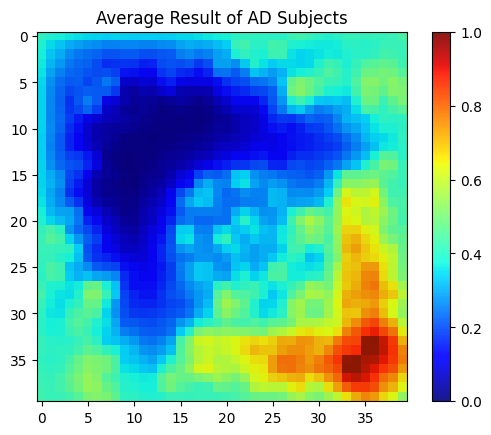

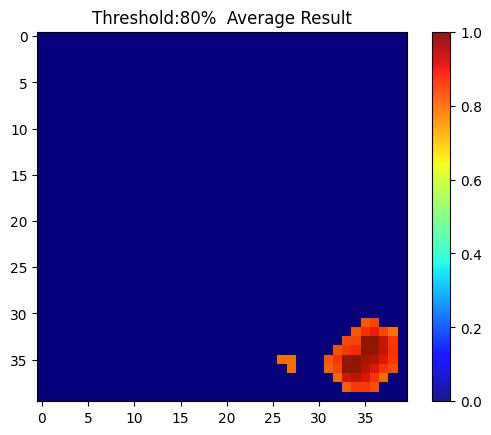

In [ ]:

path = ('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Right/Models1/Avg_GradCAM.csv')
data = pd.read_csv(path, header=None)

data.drop([0],axis=0,inplace=True)
data.drop([0],axis=1,inplace=True)

d_=data.to_numpy()
#d_ = (d_ - np.min(d_))/np.ptp(d_)
fig,ax=plt.subplots()
ax.imshow(d_)
im=ax.imshow(d_,cmap="jet",alpha=0.9)
ax.set_title('Average Result of AD Subjects')
plt.colorbar(im)
plt.show()
#fig.savefig('/content/drive/MyDrive/My/Average1.png',dpi = 1000)


for i in range(len(d_)):
 for j in range(len(d_[i])):
     if d_[i][j]<0.80:
         d_[i][j]=0

import pandas as pd
pd.DataFrame(d_).to_csv("/content/drive/MyDrive/M.Phil/Data_Asymmetry/Right/Models1/Avg_GradCAM_80.csv")

fig,ax=plt.subplots()
ax.imshow(d_)
im=ax.imshow(d_,cmap="jet",alpha=0.9)
ax.set_title('Threshold:80%  Average Result')
plt.colorbar(im)
plt.show()
fig.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Right/Models1/Avg_GradCAM80.png',dpi = 1000)

In [ ]:



#################

#avg_AD_heatmap=AD_Guided_gradcam[image,:,:]
#avg_AD_heatmap= (avg_AD_heatmap - np.min(avg_AD_heatmap))/np.ptp(avg_AD_heatmap)



#avg_AD_heatmap_mean = np.mean(avg_AD_heatmap, axis=0)
#b = cv2.resize(avg_AD_heatmap[0].astype('float'), ( 80, 80 ), interpolation = cv2.INTER_LINEAR )
# print(avg_AD_heatmap)
for image in range(AD_Guided_gradcam.shape[0]):
  fig,ax=plt.subplots()
  ax.imshow(AD_Guided_gradcam[image,:,:])
  im=ax.imshow(AD_Guided_gradcam[image,:,:],cmap="jet",alpha=0.9)
  ax.set_title('Subject:'+str(z[image])+'   Pred:Alzheimer')
  plt.colorbar(im)
  plt.show()
  fig.savefig('/content/drive/MyDrive/Logi/Result/Model5/Subject'+str(z[image])+'.png',dpi = 1000)
  pd.DataFrame(b).to_csv('/content/drive/MyDrive/Logi/Result/Model5/Subject'+str(z[image])+'.csv')


6/6 [==============================] - 0s 10ms/step
[[0.950537   0.04946301]
 [0.8763499  0.12365008]
 [0.01919585 0.98080415]
 [0.95241916 0.04758085]
 [0.52090365 0.47909632]
 [0.94603163 0.05396839]
 [0.9803546  0.01964543]
 [0.9554113  0.04458868]
 [0.9790515  0.02094854]
 [0.9677407  0.03225932]
 [0.01020628 0.9897938 ]
 [0.00769945 0.9923005 ]
 [0.1816564  0.81834364]
 [0.00314707 0.99685293]
 [0.00604656 0.9939534 ]
 [0.38053203 0.6194679 ]
 [0.47338217 0.5266178 ]
 [0.0958179  0.9041821 ]
 [0.96059567 0.03940441]
 [0.03460415 0.9653958 ]
 [0.0011853  0.9988147 ]
 [0.02842398 0.97157604]
 [0.01273069 0.9872693 ]]


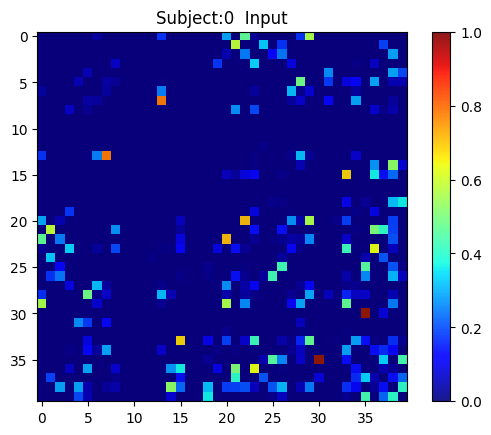

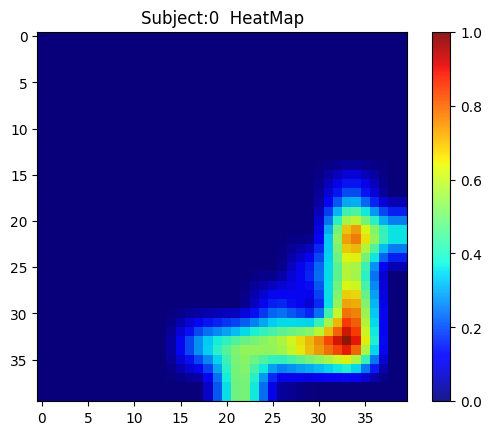

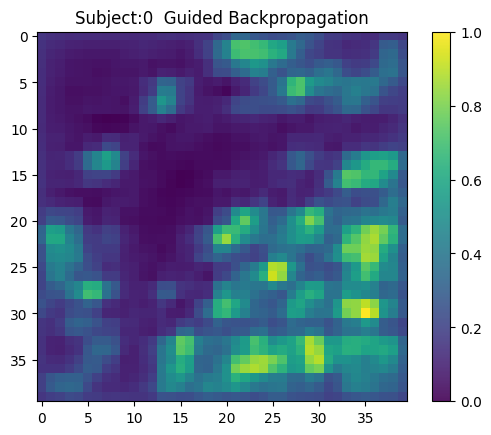

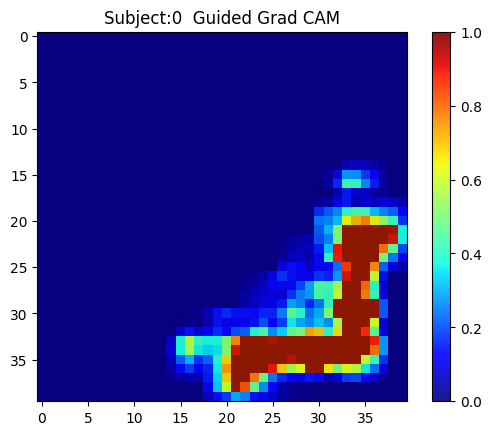

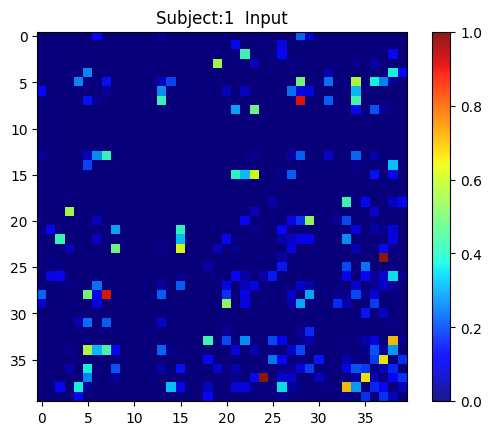

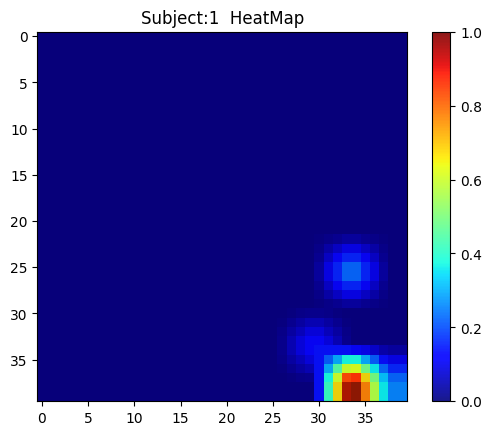

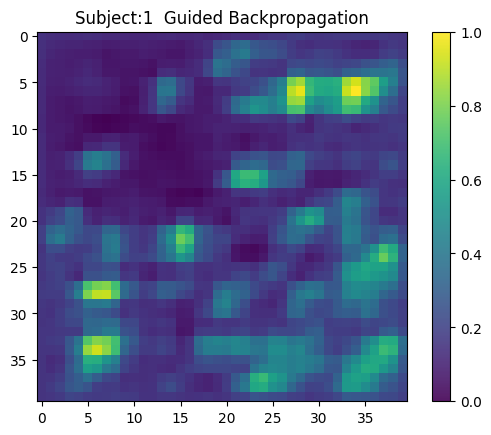

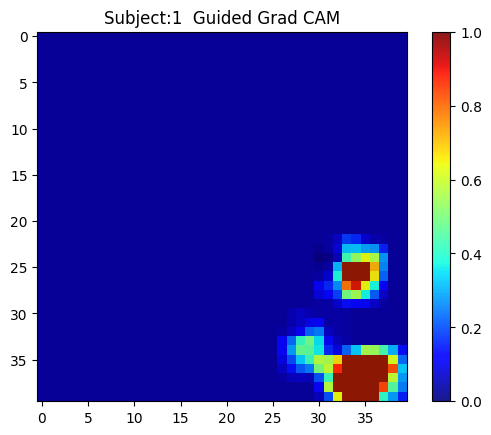

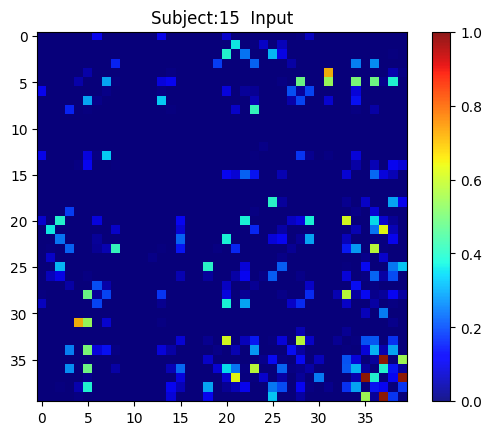

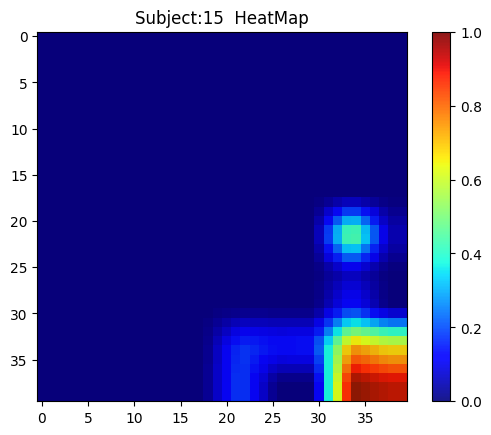

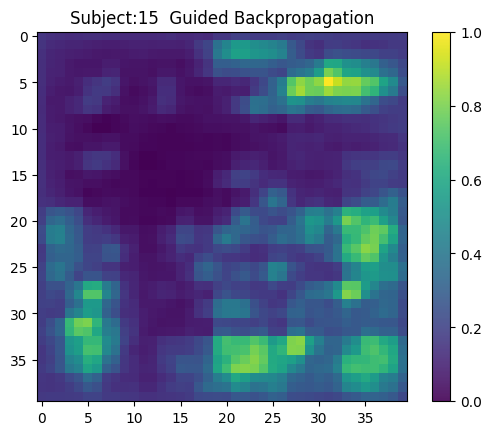

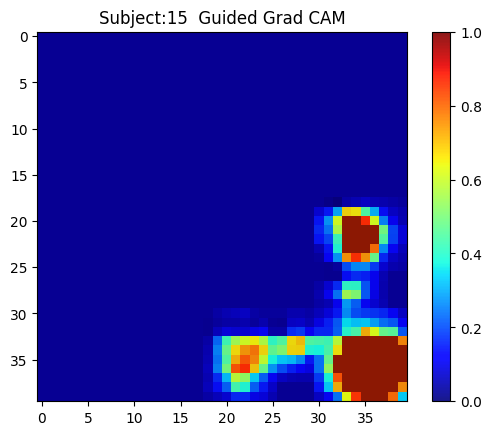

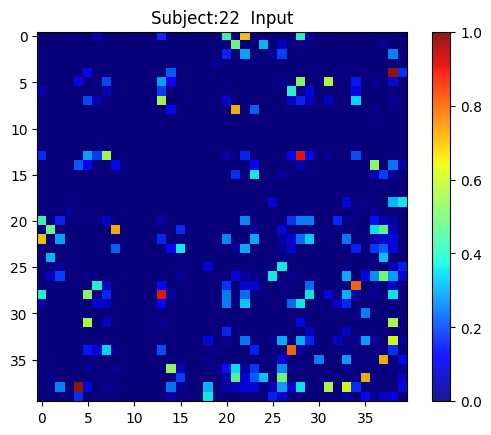

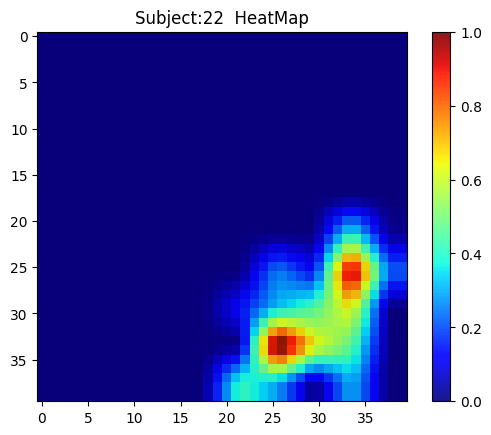

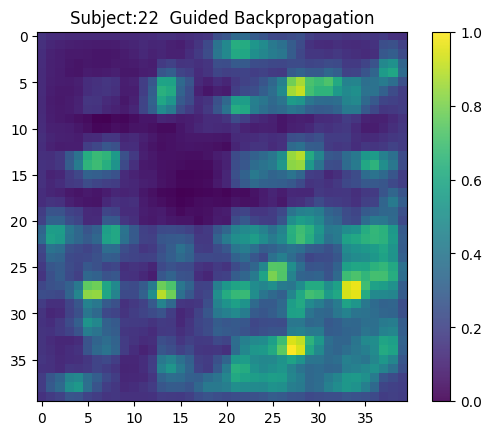

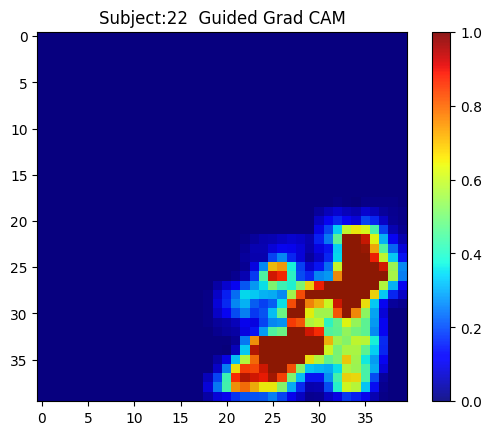

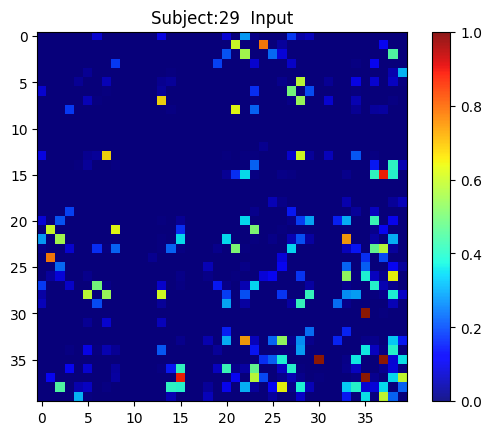

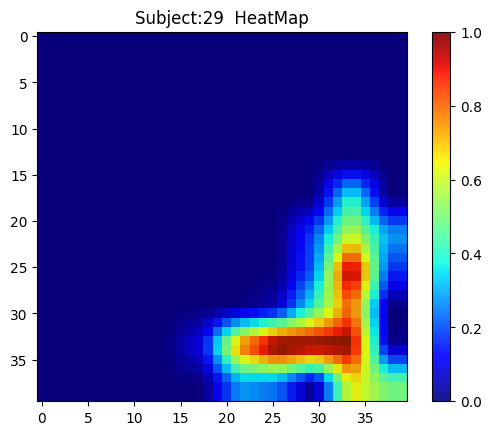

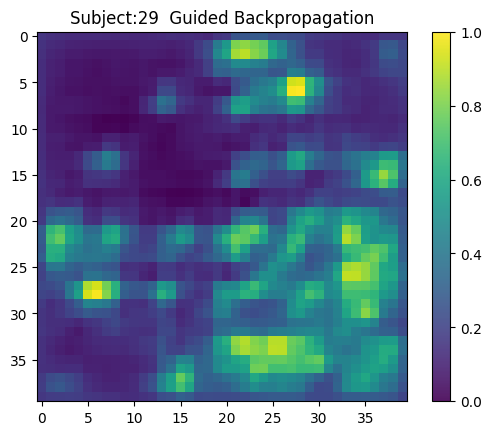

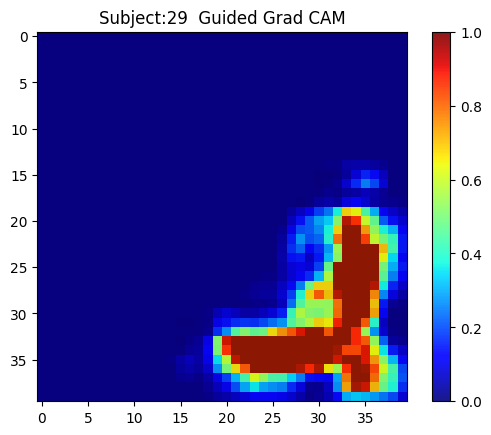

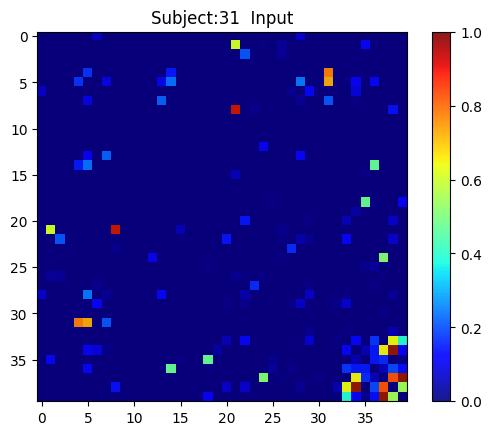

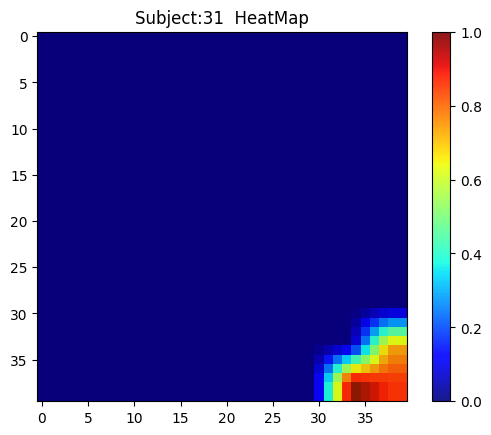

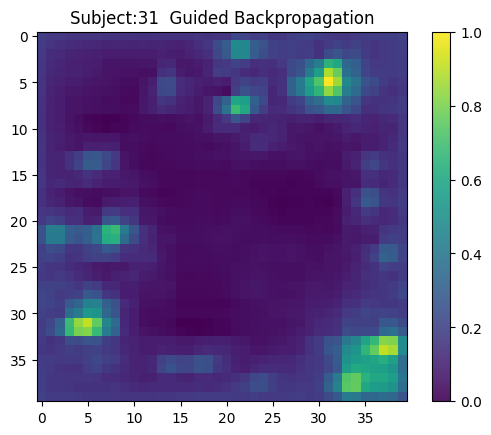

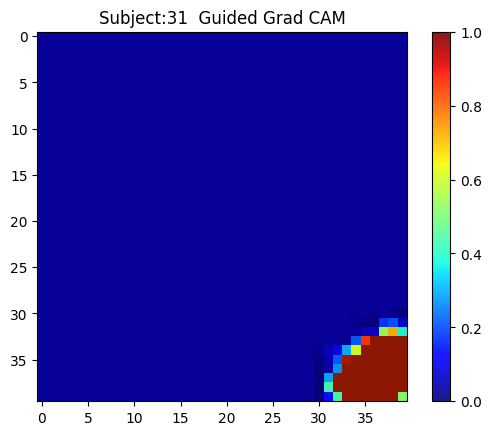

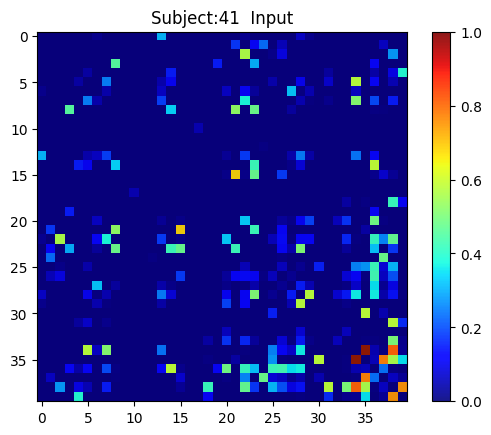

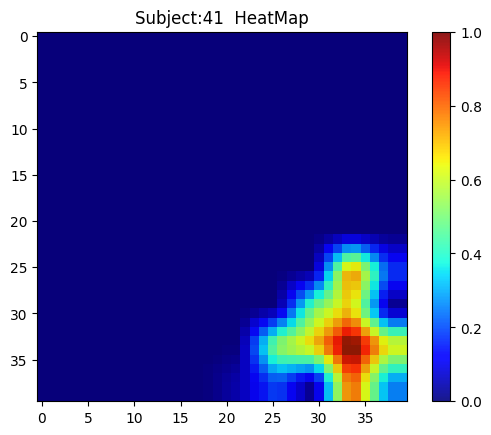

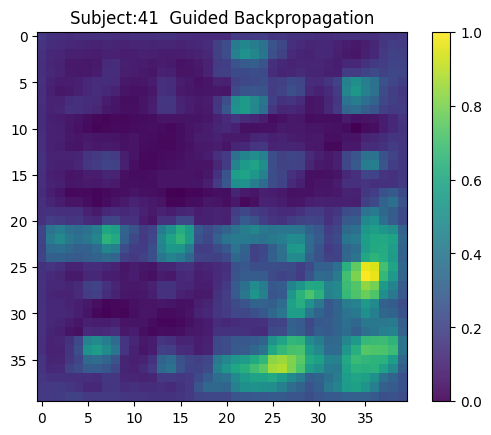

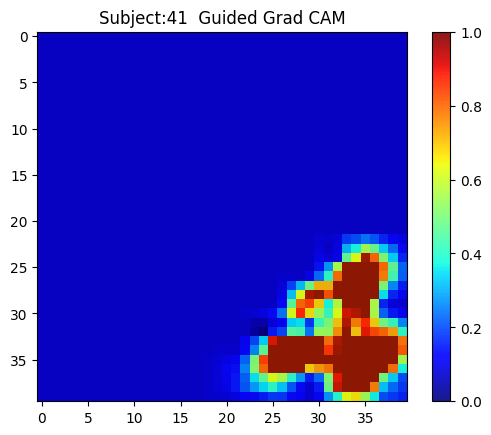

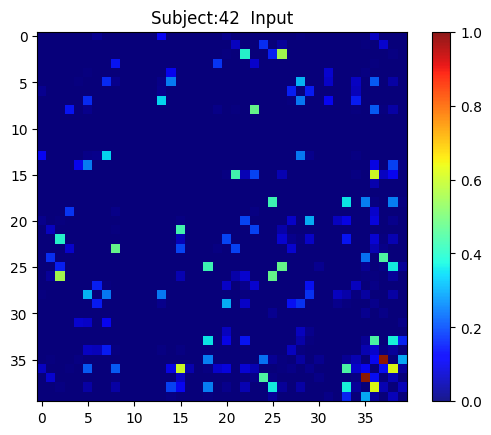

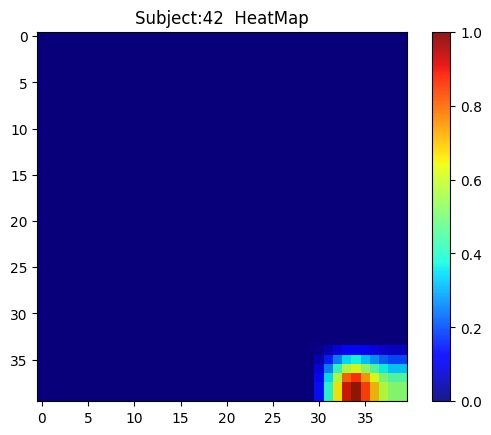

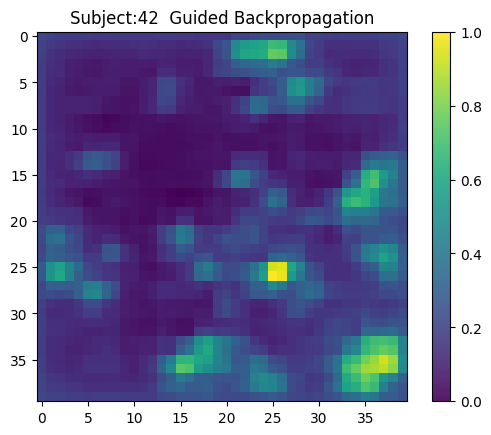

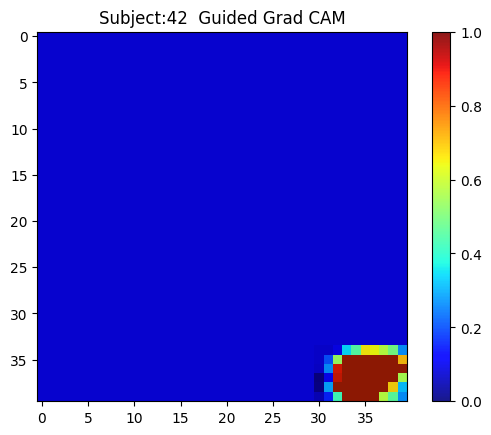

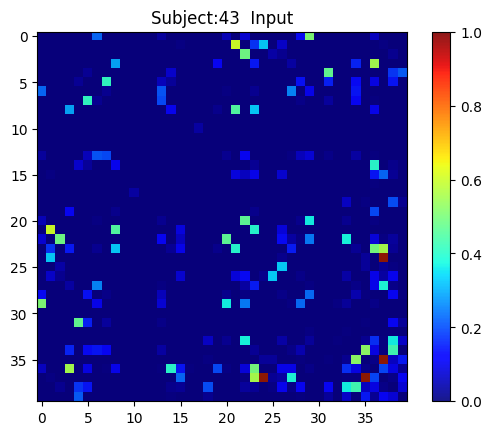

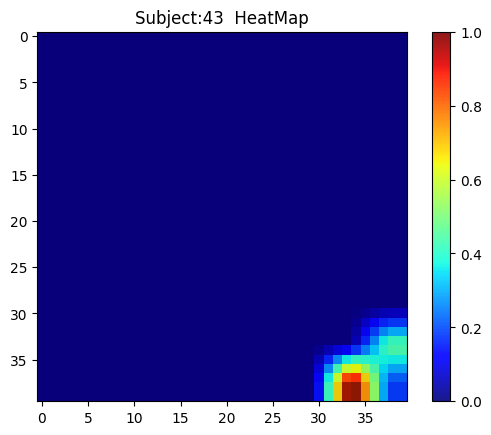

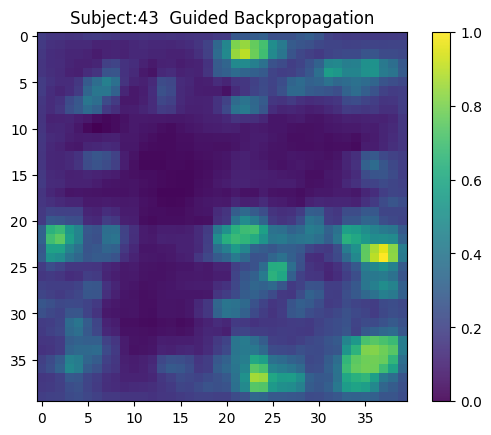

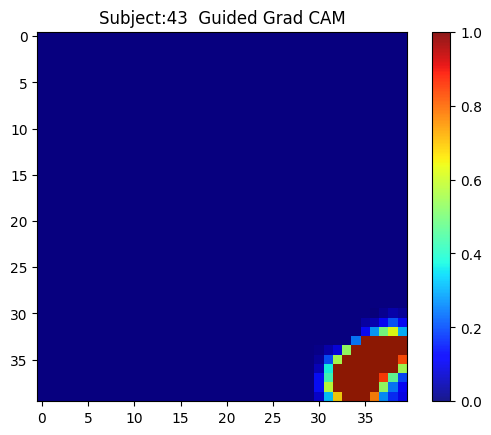

IndexError: ignored

In [ ]:
last_conv_layer_name = "last_conv"
modelbest = create_model()
modelbest.load_weights('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models'+str(5)+'/best.hdf5')
test_index = pd.read_csv('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models'+str(5)+'/testindex.csv')

data_test = Data[test_index]
data_test = np.squeeze(data_test)
data_test = data_test.reshape(data_test.shape[0], data_test.shape[1], data_test.shape[2], 1)
prediticted_classes = modelbest.predict(data_test, batch_size=4)
print(prediticted_classes)
prediticted_classes = prediticted_classes.argmax(axis=-1)
prediticted_classes = prediticted_classes.reshape(prediticted_classes.shape[0], 1)
True_test_index = test_index[(prediticted_classes==Label[test_index])]



modelbest.layers[-1].activation = None

AD_image = Data[True_test_index[Label[True_test_index]==0]]
ND_image = Data[True_test_index[Label[True_test_index]==1]]
AD_image = np.squeeze(AD_image)
ND_image = np.squeeze(ND_image)
AD_image = AD_image.reshape(AD_image.shape[0], AD_image.shape[1], AD_image.shape[2], 1)
ND_image = ND_image.reshape(ND_image.shape[0], ND_image.shape[1], ND_image.shape[2], 1)
AD_heatmap = make_gradcam_heatmap(AD_image, modelbest, last_conv_layer_name)
ND_heatmap = make_gradcam_heatmap(ND_image, modelbest, last_conv_layer_name)


#z=[11,15,16,26,30,35,39,42,47,48,49,50,53,60]
#z=[4,8,9,10,19,27,29,40,41,44,51,54]
#z=[10,14,17,28,39,41,45,48,49]
#########################
z=[0,1,15,22,29,31,41,42,43,54]
#z=[23,27,31,33,34,35,40,44,52,55,60,61]


testindex=0
for i in range(len(z)):


  testimage = AD_image[testindex,...]

  # show input
  t = np.squeeze(testimage)
  t = (t - np.min(t))/np.ptp(t)

  fig,ax=plt.subplots()
  ax.imshow(t)
  im=ax.imshow(t,cmap="jet",alpha=0.9)
  ax.set_title('Subject:'+str(z[i])+'  Input')
  plt.colorbar(im)
  plt.show()
  fig.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models5/Output/Input'+str(z[i])+'.png',dpi = 1000)



  # show heatmap
  hmap = AD_heatmap[testindex, :, :]
  hmap_resize = cv2.resize(hmap , (40, 40))
  hmap_resize = (hmap_resize - np.min(hmap_resize))/np.ptp(hmap_resize)
  fig1,ax1=plt.subplots()
  ax1.imshow(hmap_resize)
  im=ax1.imshow(hmap_resize,cmap="jet",alpha=0.9)
  ax1.set_title('Subject:'+str(z[i])+'  HeatMap')
  plt.colorbar(im)
  plt.show()
  fig1.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models5/Output/heatmap'+str(z[i])+'.png',dpi = 1000)



  # show grads image

  testimage = np.expand_dims(testimage, axis=0)
  # print(testimage.shape)
  grads = GuidedBackPropMap(modelbest, testimage, last_conv_layer_name)
  # print(grads.shape)
  g = np.squeeze(grads)
  g = (g - np.min(g))/np.ptp(g)
  fig2,ax2=plt.subplots()
  ax2.imshow(g)
  im=ax2.imshow(g,cmap="viridis",alpha=0.9)
  ax2.set_title('Subject:'+str(z[i])+'  Guided Backpropagation')
  plt.colorbar(im)
  plt.show()
  fig2.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models5/Output/Grad'+str(z[i])+'.png',dpi = 1000)



  #show Guided grad-cam
  Guided_gradcam = grads * hmap_resize[..., np.newaxis]
  Guided_gradcam = np.squeeze(Guided_gradcam)
  Guided_gradcam = deprocess_image(Guided_gradcam)
  Guided_gradcam = (Guided_gradcam - np.min(Guided_gradcam))/np.ptp(Guided_gradcam)
  fig3,ax3=plt.subplots()
  ax3.imshow(Guided_gradcam)
  im=ax3.imshow(Guided_gradcam,cmap="jet",alpha=0.9)
  ax3.set_title('Subject:'+str(z[i])+'  Guided Grad CAM')
  plt.colorbar(im)
  plt.show()
  fig3.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Models5/Output/GCAM'+str(z[i])+'.png',dpi = 1000)


  testindex = 1+testindex




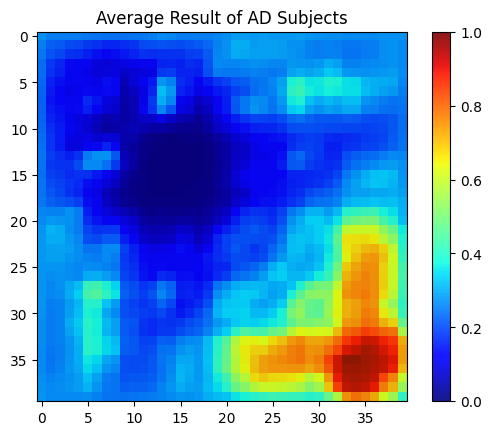

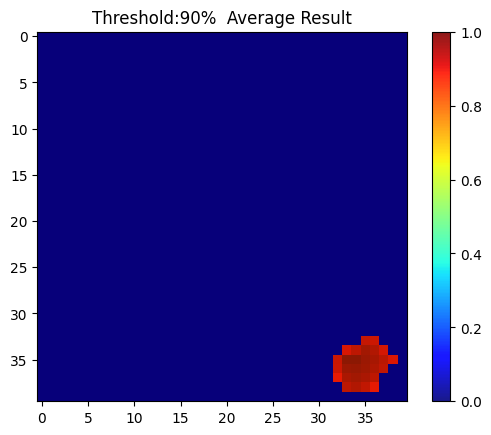

In [ ]:

path = ('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Avg_GradCAM.csv')
data = pd.read_csv(path, header=None)

data.drop([0],axis=0,inplace=True)
data.drop([0],axis=1,inplace=True)

d_=data.to_numpy()
#d_ = (d_ - np.min(d_))/np.ptp(d_)
fig,ax=plt.subplots()
ax.imshow(d_)
im=ax.imshow(d_,cmap="jet",alpha=0.9)
ax.set_title('Average Result of AD Subjects')
plt.colorbar(im)
plt.show()
#fig.savefig('/content/drive/MyDrive/My/Average1.png',dpi = 1000)


for i in range(len(d_)):
 for j in range(len(d_[i])):
     if d_[i][j]<0.90:
         d_[i][j]=0

import pandas as pd
pd.DataFrame(d_).to_csv("/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Avg_GradCAM_90.csv")

fig,ax=plt.subplots()
ax.imshow(d_)
im=ax.imshow(d_,cmap="jet",alpha=0.9)
ax.set_title('Threshold:90%  Average Result')
plt.colorbar(im)
plt.show()
fig.savefig('/content/drive/MyDrive/M.Phil/Data_Asymmetry/Models1/Avg_GradCAM90.png',dpi = 1000)